# Binary Classification Challenge (Bonus: 2.5 Points for Unit 1)


## Overview  



This challenge is worth **2.5 extra points** for Unit 1.  
Your task is to design and experiment with a **binary classification problem** using datasets generated from `sklearn`.  
You must explore how **data noise**, **loss functions**, and **evaluation metrics** affect model performance and decision boundaries.




### Technical Requirements  



- You **must use the `Architecture` class** provided in class.  
- The model should be a **Logistic Regression** implemented with **PyTorch**.  
- Use at least one dataset generated with:
  - `make_classification`, `make_circles`, or another function from `sklearn.datasets`.  
- Experiment with **different noise levels** in your dataset and analyze how this affects:
  - model convergence,  
  - decision boundary visualization, and  
  - evaluation metrics.


### Experiments to Include  



### 1. Noise Exploration  
- Generate datasets with **different noise levels** (`noise` parameter).  
- Compare visually and numerically how noise influences the results.  
- Discuss the trade-off between separability and generalization.

### 2. Decision Boundary Plot  
- Visualize your model’s **decision boundary** for different noise levels.  
- Provide an interpretation of the shapes and separability observed.  
- Use `matplotlib` to produce clear, well-labeled plots.

### 3. Loss Function Comparison  
- Train your model using both:
  - **`nn.BCELoss`**
  - **`nn.BCEWithLogitsLoss`**
- Explain the difference in how each handles **logits vs probabilities**.  
- Discuss the **numerical stability** of each method.

### 4. Evaluation Metrics  
Compute and report the following metrics for each experiment:
- Accuracy  
- Precision  
- Recall  
- Confusion Matrix  



### Repository Organization  



Your GitHub repository must be **well-structured** and follow good practices:

```bash
📂 your_project_name/
├── data/               # Optional: store generated datasets
├── notebooks/          # Jupyter notebooks or Colab links
├── src/                # Source code if you modularize your solution
├── results/            # Figures, confusion matrices, metrics, etc.
├── README.md           # Detailed documentation (see below)
└── requirements.txt    # Dependencies (if applicable)
```



**`README.md`** must include:
- Project description  
- Instructions on how to execute the code  
- Explanation of your results and observations  
- Comparison of both BCE loss variants  
- Screenshots or plots of **decision boundaries** and **confusion matrices**  
- Link to your presentation video  

---

**Presentation**  

Record a **video (maximum 10 minutes)** using **Loom** or **YouTube** where you:
- Present yourself and introduce your experiment setup  
- Explain your dataset and noise configurations  
- Show and interpret the plots and metrics  
- Conclude with insights on the effects of noise and loss choices  

Include the **video link** in your `README.md`.

---



### ✅ Summary Checklist

| Item | Description | Status |
|------|--------------|--------|
| Dataset | Generated using sklearn (with varying noise levels) | ☐ |
| Model | Logistic Regression using PyTorch | ☐ |
| Architecture | Used the provided `Architecture` class | ☐ |
| Loss Functions | `BCELoss` and `BCEWithLogitsLoss` comparison | ☐ |
| Metrics | Accuracy, Precision, Recall, F1, Confusion Matrix | ☐ |
| Plots | Decision boundary and confusion matrix visuals | ☐ |
| Repository | Well-structured with clear README | ☐ |
| Video | Up to 10 min explaining the full project | ☐ |

---



### Bonus Tip  
To earn full points, focus on:
- **Code clarity** (comments, consistent naming, organized folders)  
- **Reproducibility** (random seeds, clear dependencies)  
- **Interpretation depth** (go beyond the numbers — explain *why* results change)  
- **Visual storytelling** — plots should speak for themselves!







## Imports

In [1]:
import numpy as np
import datetime
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torch.optim as optim
import torch.nn as nn
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('fivethirtyeight')

## Synthetic Data Generation

In [2]:
# For reproducibility
np.random.seed(42)

# Generate different binary classification datasets

# ------------------------------------------------------------
# Dataset 1 - Linearly separable synthetic data
# ------------------------------------------------------------
# make_classification generates data for a classification task
# Key parameters:
# - n_samples: total number of points
# - n_features: number of input features (X columns)
# - n_redundant: number of features that are linear combinations of others
# - n_informative: number of features that actually affect the output
# - n_clusters_per_class: controls how many clusters per class
# - n_classes: number of target classes (default = 2)
# - class_sep: controls how far apart the classes are (larger → easier to separate)
# - random_state: for reproducibility

X1, y1 = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=2,          # Number of output classes (binary problem)
    class_sep=1.0,        # Increase for more separable classes
    random_state=42
)

X2, y2 = make_classification(
    n_samples=3000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=2,          # Number of output classes (binary problem)
    class_sep=1.0,        # Increase for more separable classes
    random_state=42
)

# ------------------------------------------------------------
# Dataset 2 - Concentric circles (nonlinear decision boundary)
# ------------------------------------------------------------
# make_circles creates points arranged in two concentric circles
# Parameters:
# - n_samples: total number of samples
# - factor: ratio between inner and outer circle radii
# - noise: standard deviation of Gaussian noise added to the data
# - random_state: seed for reproducibility
# Always generates 2 classes (inner vs outer circle)

X3, y3 = make_circles(
    n_samples=300,
    factor=0.5,      # Inner circle radius as a fraction of the outer circle
    noise=0.1,       # Add noise to make it more realistic
    random_state=42
)

X4, y4 = make_circles(
    n_samples=3000,
    factor=0.5,      # Inner circle radius as a fraction of the outer circle
    noise=0.1,       # Add noise to make it more realistic
    random_state=42
)

# ------------------------------------------------------------
# Dataset 3 - Two interleaving moons (nonlinear)
# ------------------------------------------------------------
# make_moons is another classic nonlinear binary dataset
# Parameters:
# - n_samples: total number of points
# - noise: Gaussian noise added to data
# - random_state: for reproducibility

X5, y5 = make_moons(
    n_samples=300,
    noise=0.1,
    random_state=42
)

X6, y6 = make_moons(
    n_samples=3000,
    noise=0.1,
    random_state=42
)

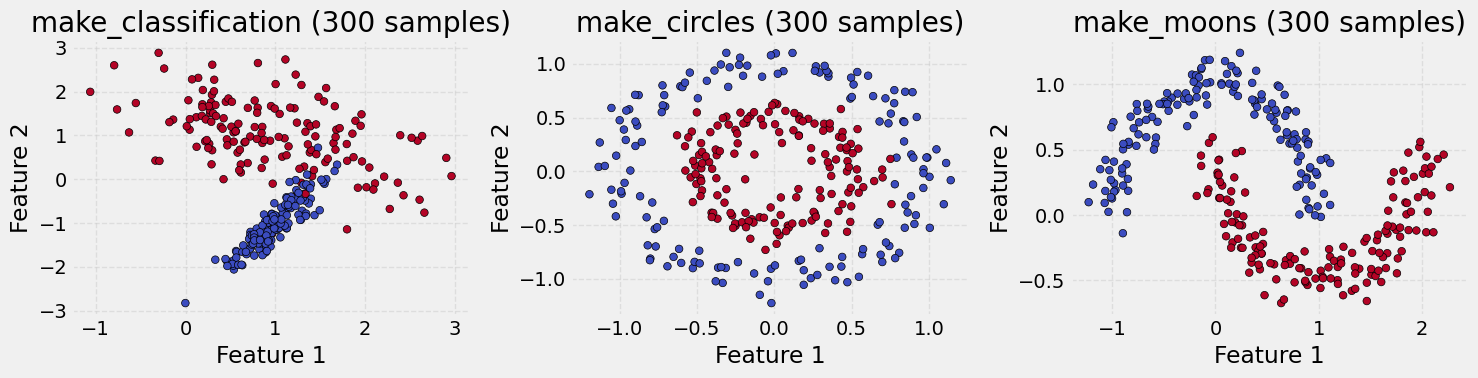

<Figure size 640x480 with 0 Axes>

In [86]:
# 300 samples
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

datasets = [(X1, y1, "make_classification (300 samples)"),
            (X3, y3, "make_circles (300 samples)"),
            (X5, y5, "make_moons (300 samples)"),
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# plt.savefig("plot_300_samples.png",
#             format="png",
#             dpi=800,
#             bbox_inches="tight",
#             transparent=False)

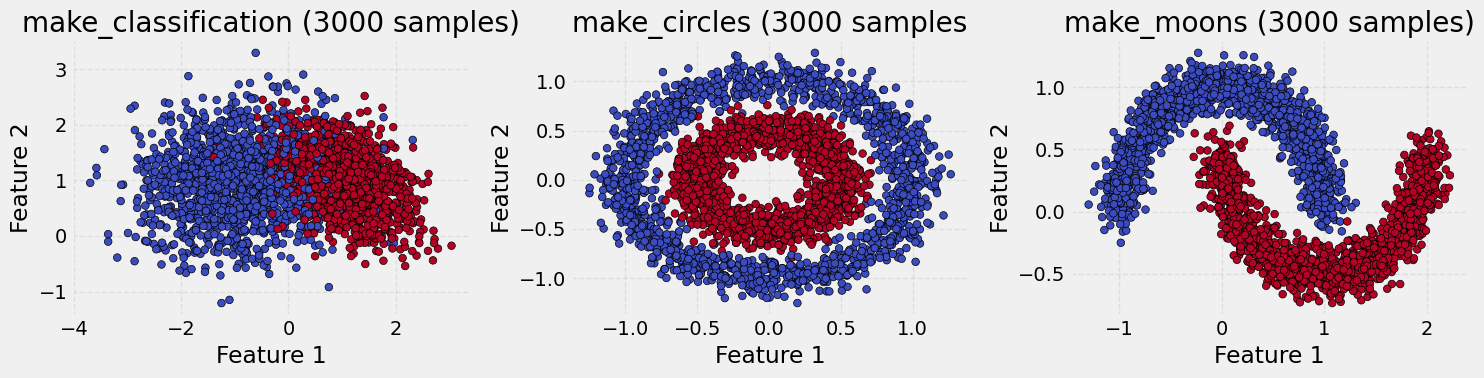

<Figure size 640x480 with 0 Axes>

In [4]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

datasets = [(X2, y2, "make_classification (3000 samples)"),
            (X4, y4, "make_circles (3000 samples"),
            (X6, y6, "make_moons (3000 samples)")]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

# plt.savefig("plot_3000_samples.png",
#             format="png",
#             dpi=400,
#             bbox_inches="tight",
#             transparent=False)

## Architecture class

In [5]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class

        # We start by storing the arguments as attributes
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None

        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model,
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer

        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Once the data loader and step function, this is the same
        # mini-batch loop we had beforemake_classification
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename,weights_only=False)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval()
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig

## Functions Data visualization

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def probability_line(ax, y, probs, threshold, shift=0.0, annot=False, colors=None):
    if colors is None:
        colors = ['r', 'b']
    ax.grid(False)
    ax.set_ylim([-.1, .1])
    ax.axes.get_yaxis().set_visible(False)
    ax.plot([0, 1], [0, 0], linewidth=2, c='k', zorder=1)
    ax.plot([0, 0], [-.1, .1], c='k', zorder=1)
    ax.plot([1, 1], [-.1, .1], c='k', zorder=1)

    tn = (y == 0) & (probs < threshold)
    fn = (y == 0) & (probs >= threshold)
    tp = (y == 1) & (probs >= threshold)
    fp = (y == 1) & (probs < threshold)

    ax.plot([threshold, threshold], [-.1, .1], c='k', zorder=1, linestyle='--')
    ax.scatter(probs[tn], np.zeros(tn.sum()) + shift, c=colors[0], s=150, zorder=2, edgecolor=colors[0], linewidth=3)
    ax.scatter(probs[fn], np.zeros(fn.sum()) + shift, c=colors[0], s=150, zorder=2, edgecolor=colors[1], linewidth=3)

    ax.scatter(probs[tp], np.zeros(tp.sum()) - shift, c=colors[1], s=150, zorder=2, edgecolor=colors[1], linewidth=3)
    ax.scatter(probs[fp], np.zeros(fp.sum()) - shift, c=colors[1], s=150, zorder=2, edgecolor=colors[0], linewidth=3)

    ax.set_xlabel(r'$\sigma(z) = P(y=1)$')
    ax.set_title('Threshold = {}'.format(threshold))

    if annot:
        ax.annotate('TN', xy=(.20, .03), c='k', weight='bold', fontsize=20)
        ax.annotate('FN', xy=(.20, -.08), c='k', weight='bold', fontsize=20)
        ax.annotate('FP', xy=(.70, .03), c='k', weight='bold', fontsize=20)
        ax.annotate('TP', xy=(.70, -.08), c='k', weight='bold', fontsize=20)
    return ax

In [8]:
def probability_contour(ax, model, device, X, y, threshold, cm=None, cm_bright=None):
    if cm is None:
        cm = plt.cm.RdBu
    if cm_bright is None:
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    h = .02  # step size in the mesh

    x_min, x_max = -2.25, 2.25
    y_min, y_max = -2.25, 2.25

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    logits = model(torch.as_tensor(np.c_[xx.ravel(), yy.ravel()]).float().to(device))
    logits = logits.detach().cpu().numpy().reshape(xx.shape)

    yhat = sigmoid(logits)

    ax.contour(xx, yy, yhat, levels=[threshold], cmap="Greys", vmin=0, vmax=1)
    contour = ax.contourf(xx, yy, yhat, 25, cmap=cm, alpha=.8, vmin=0, vmax=1)
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    #ax.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')
    ax.set_title(r'$\sigma(z) = P(y=1)$')
    ax.grid(False)

    ax_c = plt.colorbar(contour)
    ax_c.set_ticks([0, .25, .5, .75, 1])
    return ax

In [9]:
def figure9(x, y, model, device, probabilities, threshold, shift=0.0, annot=False, cm=None, cm_bright=None):
    fig = plt.figure(figsize=(15, 5))
    gs = fig.add_gridspec(3, 3)

    ax = fig.add_subplot(gs[:, 0])
    probability_contour(ax, model, device, x, y, threshold, cm, cm_bright)

    if cm_bright is None:
        colors = ['r', 'b']
    else:
        colors = cm_bright.colors

    ax = fig.add_subplot(gs[1, 1:])
    probability_line(ax, y, probabilities, threshold, shift, annot, colors)

    fig.tight_layout()
    return fig

In [10]:
def figure10(y, probabilities, threshold, shift, annot, colors=None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 2))
    probability_line(ax, y, probabilities, threshold, shift, annot, colors)
    fig.tight_layout()
    return fig

## Functions metric

In [11]:
def split_cm(cm):
    # Actual negatives go in the top row,
    # above the probability line
    actual_negative = cm[0]
    # Predicted negatives go in the first column
    tn = actual_negative[0]
    # Predicted positives go in the second column
    fp = actual_negative[1]

    # Actual positives go in the bottow row,
    # below the probability line
    actual_positive = cm[1]
    # Predicted negatives go in the first column
    fn = actual_positive[0]
    # Predicted positives go in the second column
    tp = actual_positive[1]

    return tn, fp, fn, tp

In [12]:
def tpr_fpr(cm):
    tn, fp, fn, tp = split_cm(cm)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return tpr, fpr

In [13]:
def precision_recall(cm):
    tn, fp, fn, tp = split_cm(cm)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    return precision, recall

## Using data with make_classification

### 300 samples

#### Date preparation

In [14]:
# Split the dataset into training and validation sets
# 20% of the data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=.2, random_state=13)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)

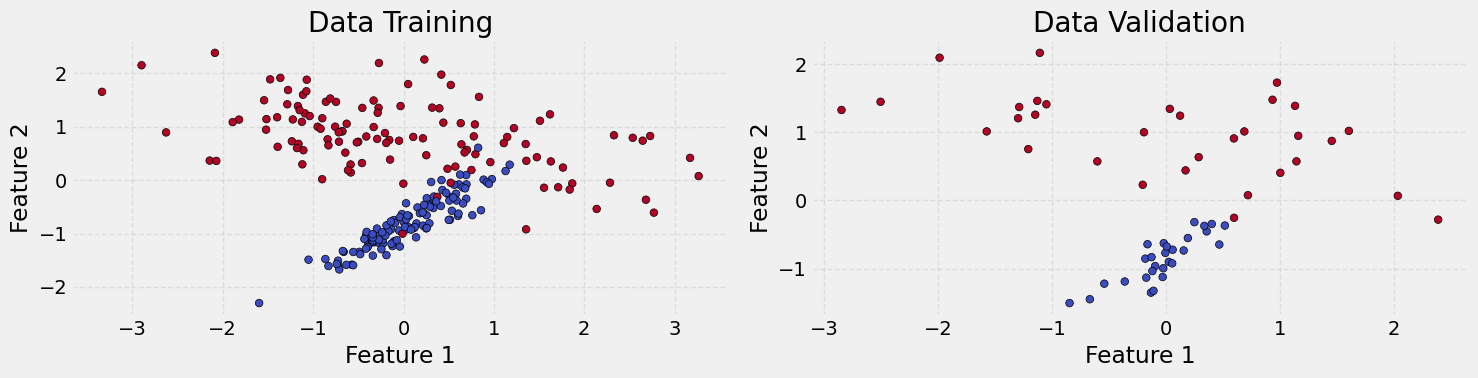

In [15]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

datasets = [(X_train, y_train, "Data Training"),
            (X_val, y_val, "Data Validation")
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [16]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)

#### Model configuration

In [17]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

#### Training

In [18]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

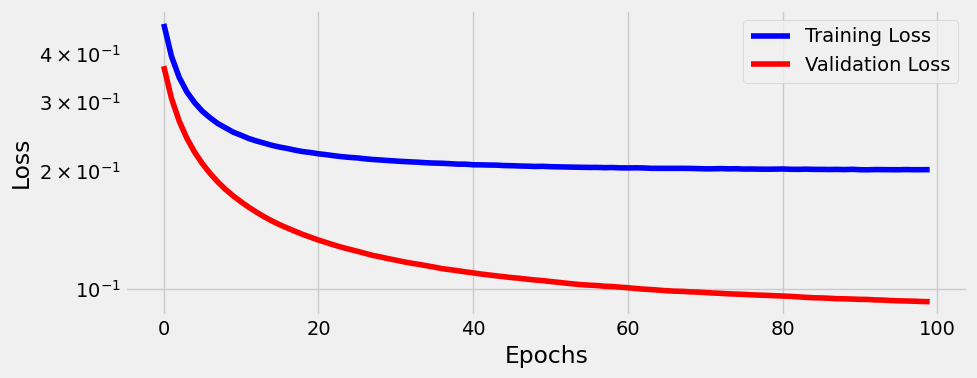

In [19]:
fig = arch.plot_losses()

fig.savefig("classification_loss_1.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Data visualization

In [20]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

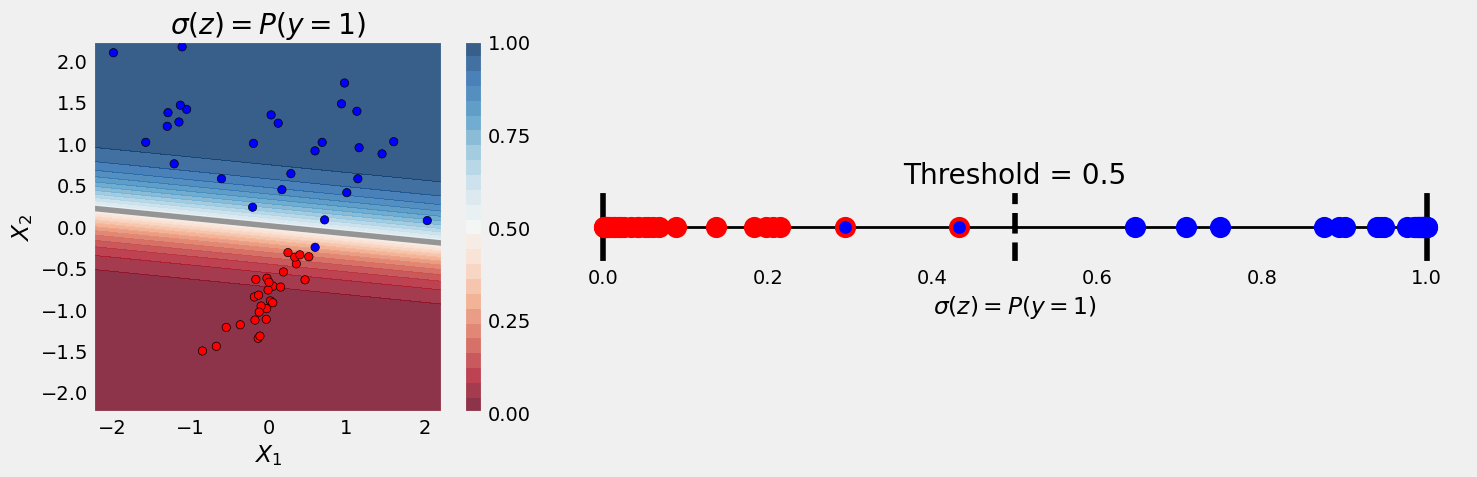

In [21]:
fig = figure9(X_val, y_val, arch.model, arch.device, probabilities_val, threshold)

fig.savefig("confusion_matrix_classification_1.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Metrics

In [22]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[28,  0],
       [ 2, 30]])

In [23]:
precision_recall(cm_thresh50)

(np.float64(1.0), np.float64(0.9375))

In [24]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.9666666666666667

#### Confusion Matrix

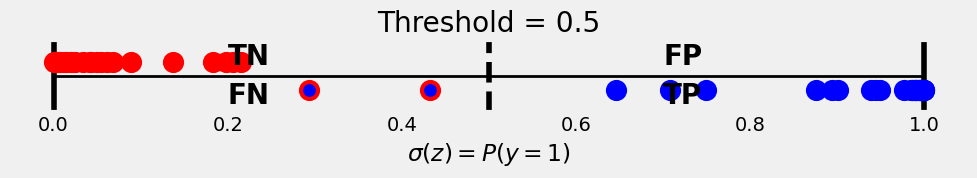

In [25]:
fig = figure10(y_val, probabilities_val, threshold, 0.04, True)

### 3000 samples

#### Date preparation

In [26]:
# Split the dataset into training and validation sets
# 20% of the data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=.2, random_state=13)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)

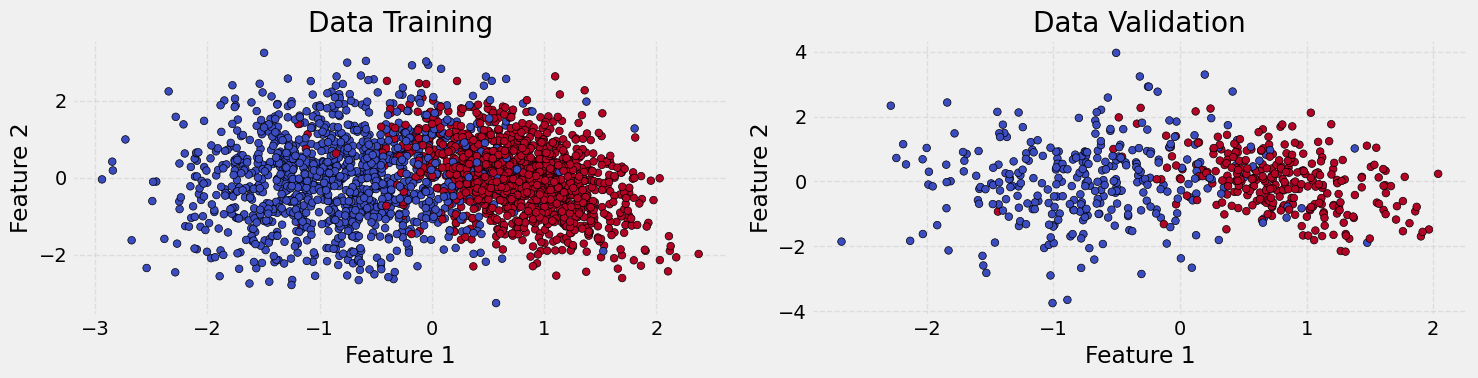

In [27]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

datasets = [(X_train, y_train, "Data Training"),
            (X_val, y_val, "Data Validation")
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [28]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)

#### Model configuration

In [29]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

#### Training

In [30]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

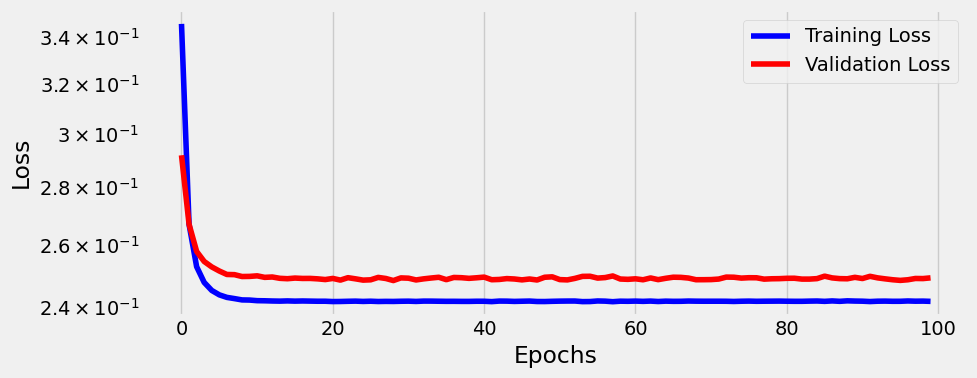

In [31]:
fig = arch.plot_losses()

fig.savefig("classification_loss_2.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Data visualization

In [32]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

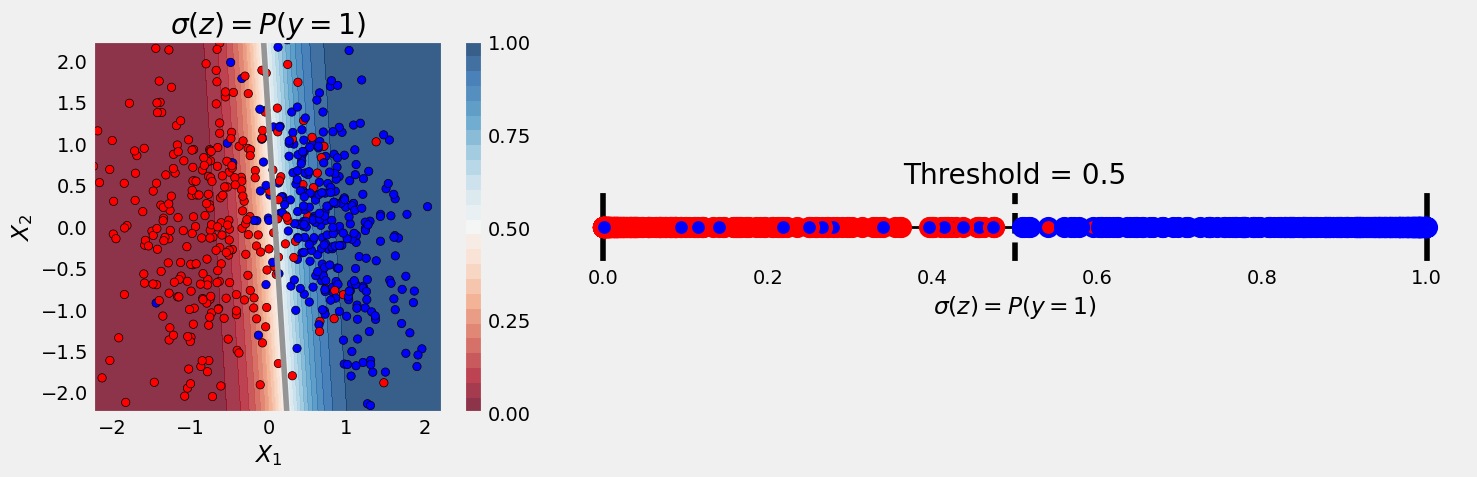

In [33]:
fig = figure9(X_val, y_val, arch.model, arch.device, probabilities_val, threshold)

fig.savefig("confusion_matrix_classification_2.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Metrics

In [34]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[272,  37],
       [ 21, 270]])

In [35]:
precision_recall(cm_thresh50)

(np.float64(0.8794788273615635), np.float64(0.9278350515463918))

In [36]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.9033333333333333

#### Confusion Matrix

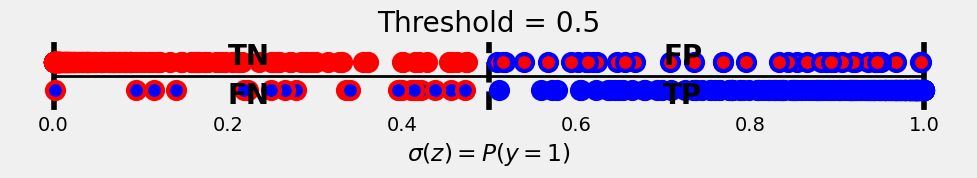

In [37]:
fig = figure10(y_val, probabilities_val, threshold, 0.04, True)

## Using data with make_circles

### 300 samples

#### Date preparation

In [38]:
# Split the dataset into training and validation sets
# 20% of the data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size=.2, random_state=13)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)

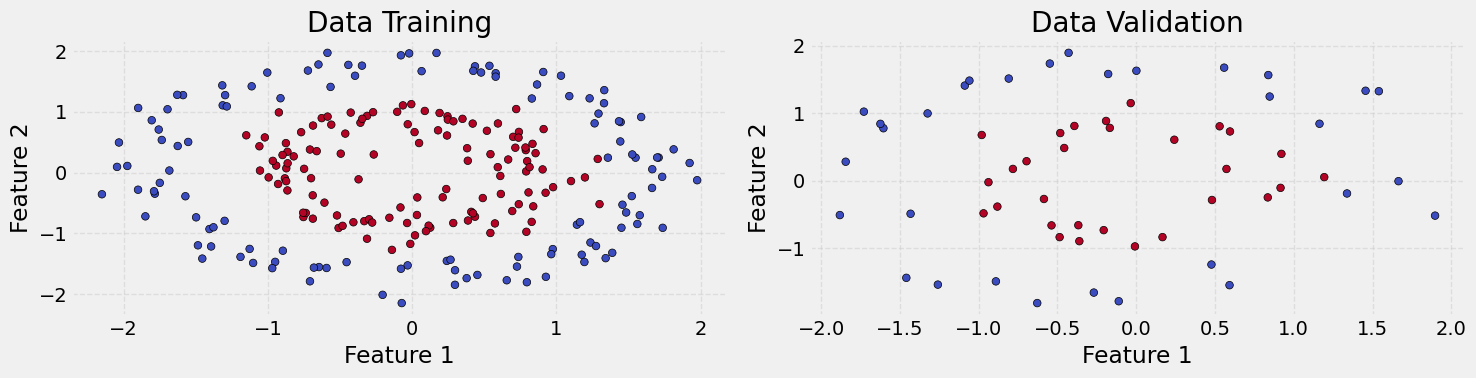

In [39]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

datasets = [(X_train, y_train, "Data Training"),
            (X_val, y_val, "Data Validation")
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [40]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)

#### Model configuration

In [41]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

#### Training

In [42]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

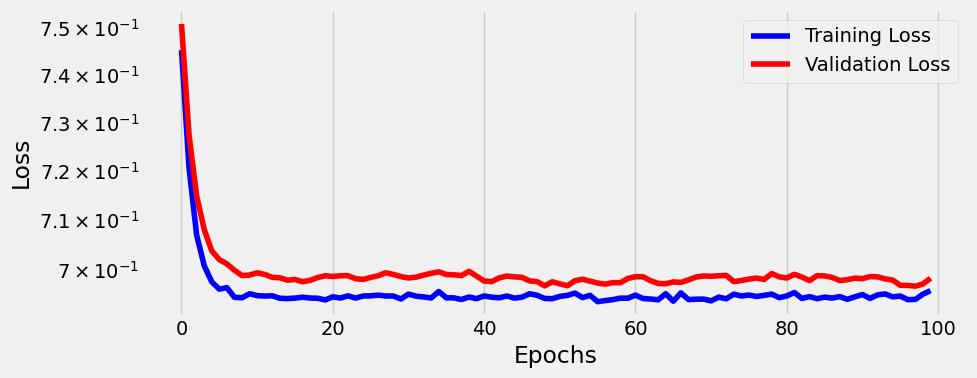

In [43]:
fig = arch.plot_losses()

fig.savefig("circles_loss_1.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Data visualization

In [44]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

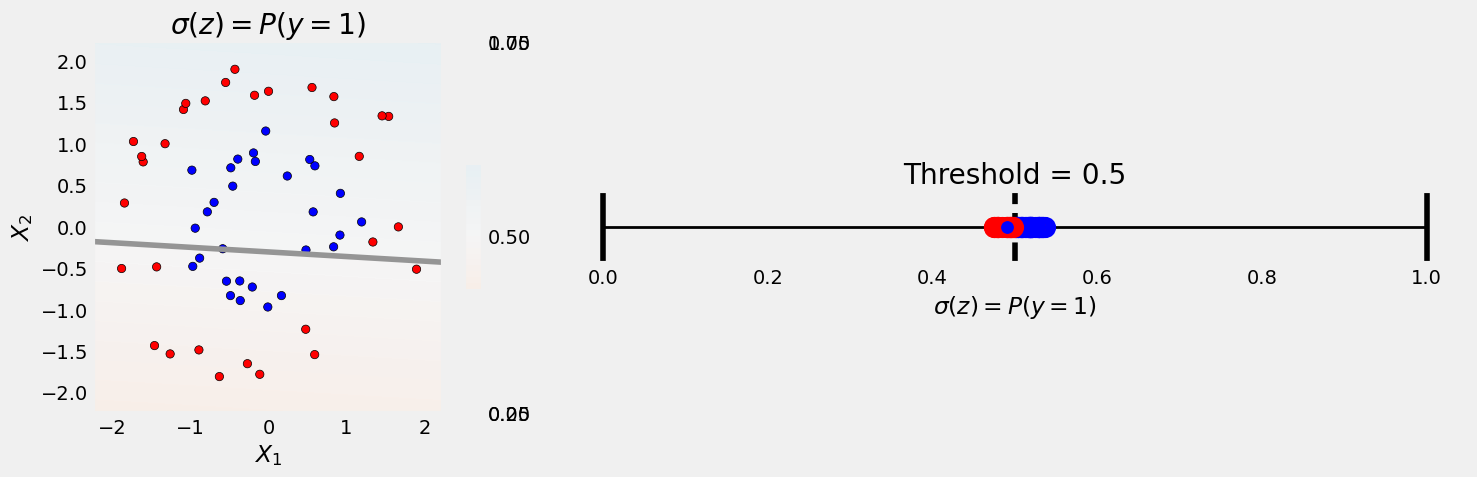

In [45]:
fig = figure9(X_val, y_val, arch.model, arch.device, probabilities_val, threshold)

fig.savefig("confusion_matrix_circles_1.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Metrics

In [46]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[11, 20],
       [ 9, 20]])

In [47]:
precision_recall(cm_thresh50)

(np.float64(0.5), np.float64(0.6896551724137931))

In [48]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.5166666666666667

#### Confusion Matrix

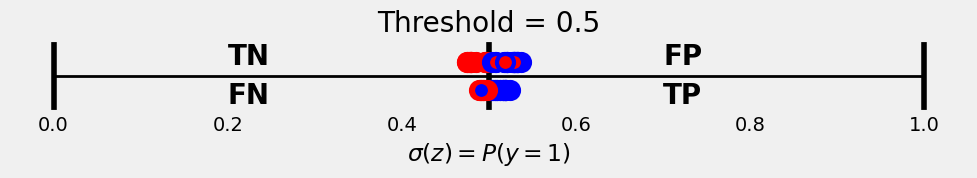

In [49]:
fig = figure10(y_val, probabilities_val, threshold, 0.04, True)

### 3000 samples

#### Date preparation

In [50]:
# Split the dataset into training and validation sets
# 20% of the data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X4, y4, test_size=.2, random_state=13)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)

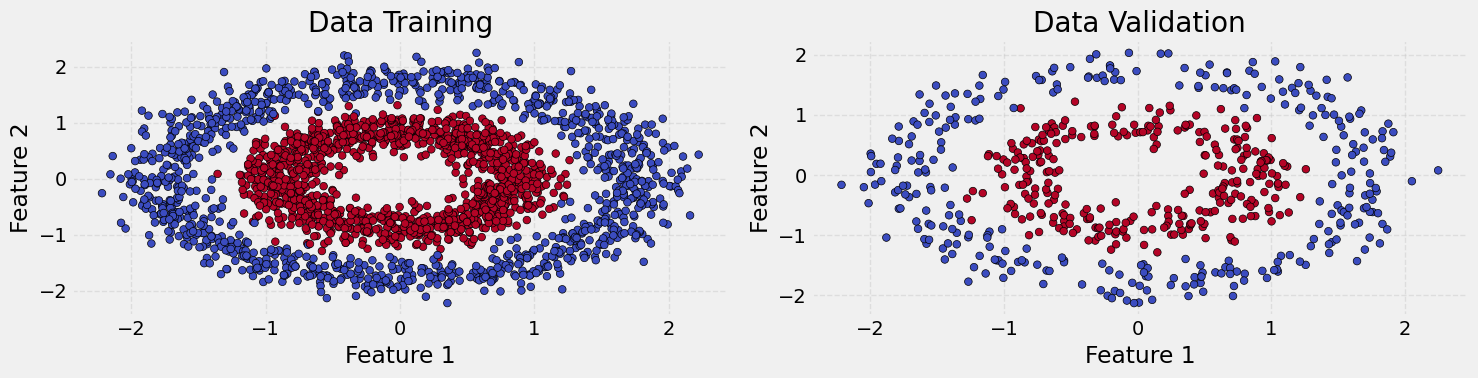

In [51]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

datasets = [(X_train, y_train, "Data Training"),
            (X_val, y_val, "Data Validation")
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [52]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)

#### Model configuration

In [53]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

#### Training

In [54]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

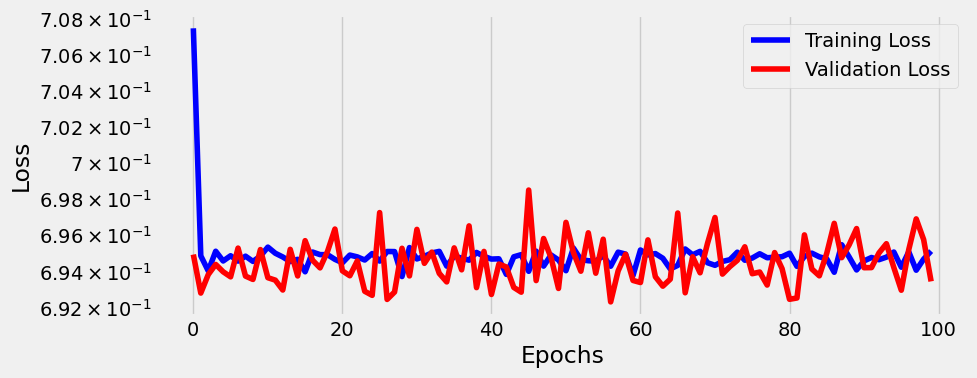

In [55]:
fig = arch.plot_losses()

fig.savefig("circles_loss_2.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Data visualization

In [56]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

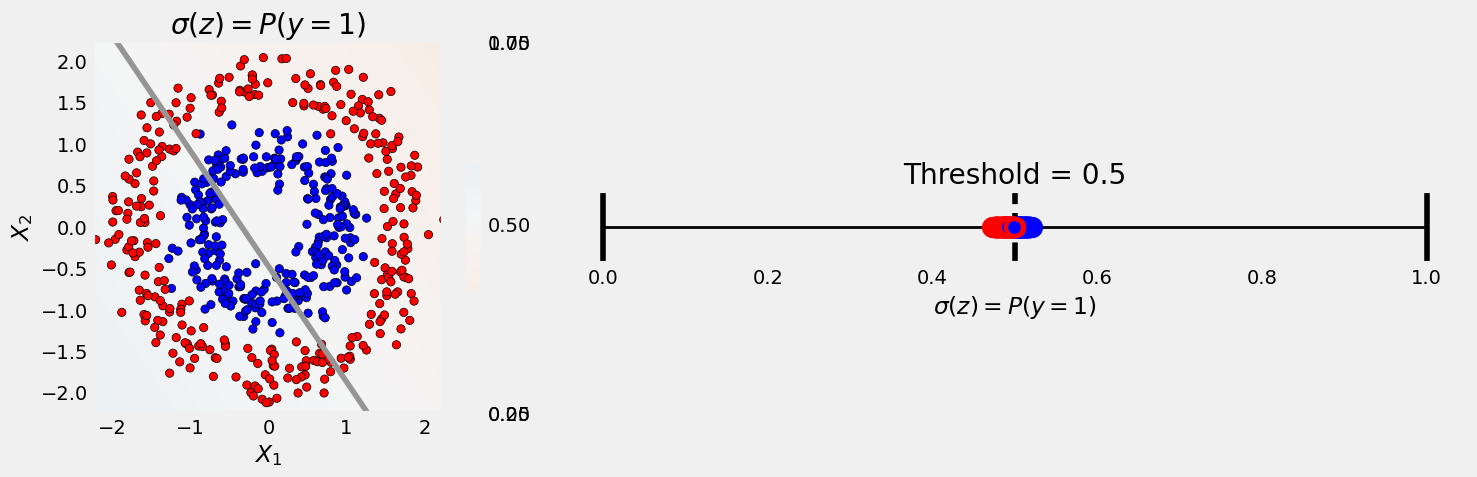

In [57]:
fig = figure9(X_val, y_val, arch.model, arch.device, probabilities_val, threshold)

fig.savefig("confusion_matrix_circles_2.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Metrics

In [58]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[158, 154],
       [173, 115]])

In [59]:
precision_recall(cm_thresh50)

(np.float64(0.4275092936802974), np.float64(0.3993055555555556))

In [60]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.455

#### Confusion Matrix

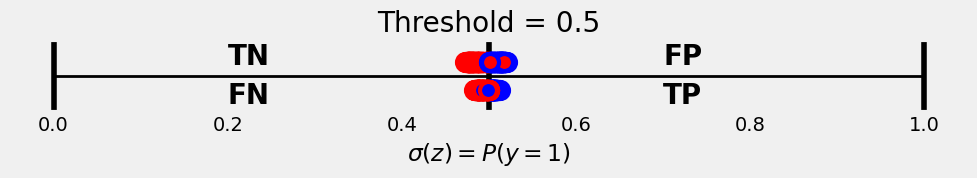

In [61]:
fig = figure10(y_val, probabilities_val, threshold, 0.04, True)

## Using data with make_moons

### 300 samples

#### Date preparation

In [62]:
# Split the dataset into training and validation sets
# 20% of the data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X5, y5, test_size=.2, random_state=13)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)

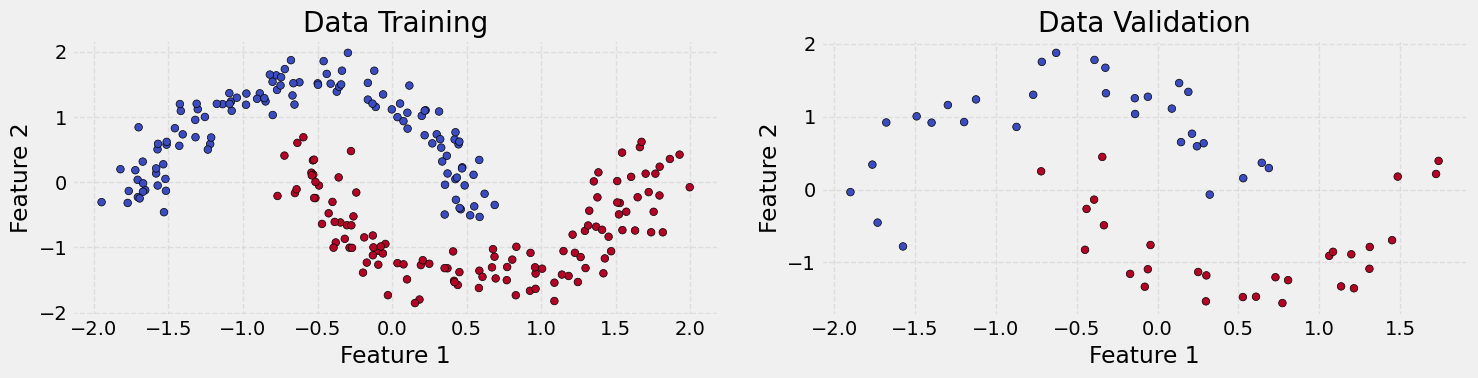

In [63]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

datasets = [(X_train, y_train, "Data Training"),
            (X_val, y_val, "Data Validation")
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [64]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)

#### Model configuration

In [65]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

#### Training

In [66]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

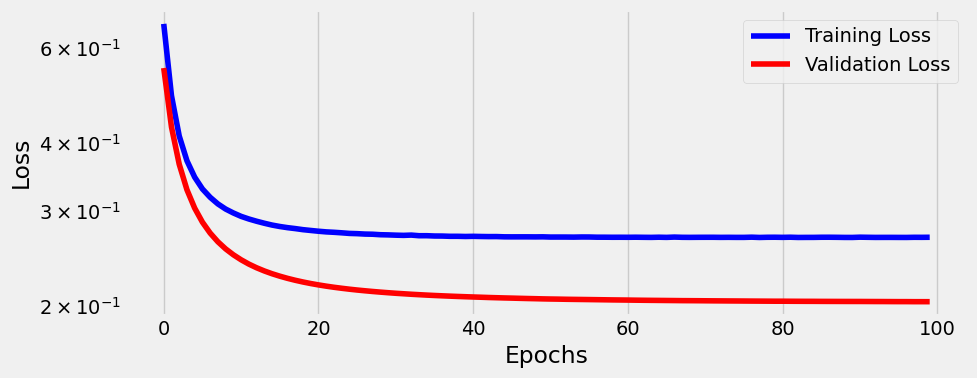

In [67]:
fig = arch.plot_losses()

fig.savefig("moons_loss_1.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Data visualization

In [68]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

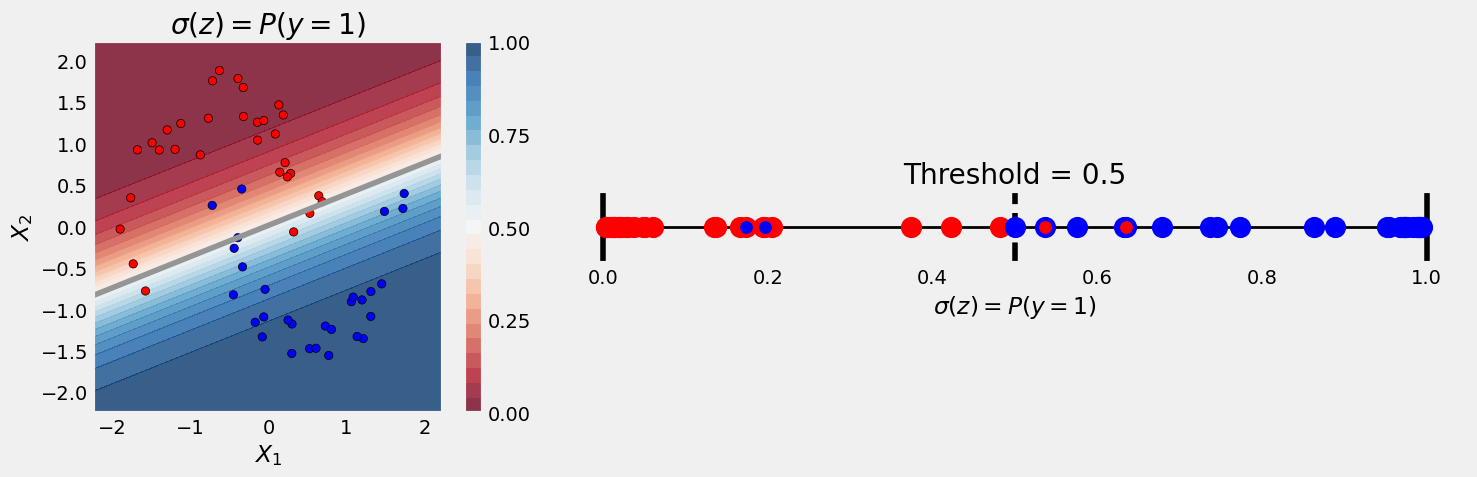

In [69]:
fig = figure9(X_val, y_val, arch.model, arch.device, probabilities_val, threshold)

fig.savefig("confusion_matrix_moons_1.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Metrics

In [70]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[28,  3],
       [ 2, 27]])

In [71]:
precision_recall(cm_thresh50)

(np.float64(0.9), np.float64(0.9310344827586207))

In [72]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.9166666666666666

#### Confusion Matrix

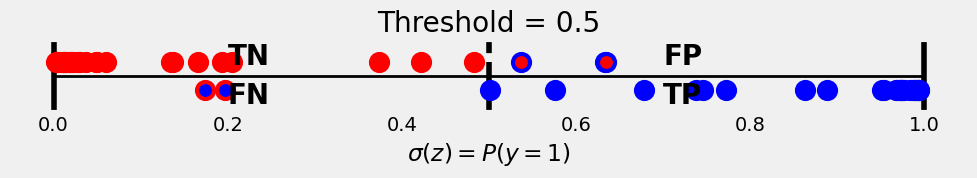

In [73]:
fig = figure10(y_val, probabilities_val, threshold, 0.04, True)

### 3000 samples

#### Date preparation

In [74]:
# Split the dataset into training and validation sets
# 20% of the data is used for validation
X_train, X_val, y_train, y_val = train_test_split(X6, y6, test_size=.2, random_state=13)

# Initialize a StandardScaler instance
sc = StandardScaler()

# Fit the scaler only on the training data
# This computes the mean and standard deviation to be used for later scaling
sc.fit(X_train)

# Transform both training and validation sets
# Scale the training data
X_train = sc.transform(X_train)

# Apply the same transformation to the validation data
X_val = sc.transform(X_val)

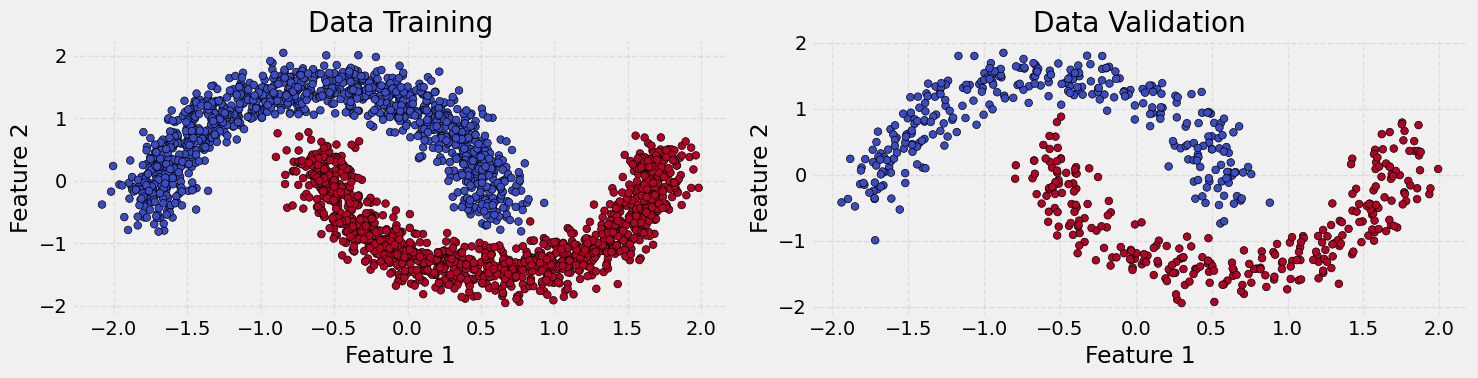

In [75]:
# Plot all datasets in a grid (3 columns)

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

datasets = [(X_train, y_train, "Data Training"),
            (X_val, y_val, "Data Validation")
            ]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [76]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True
)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=16)

#### Model configuration

In [77]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(2, 1))

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function
loss_fn = nn.BCEWithLogitsLoss()

#### Training

In [78]:
n_epochs = 100

arch = Architecture(model, loss_fn, optimizer)
arch.set_loaders(train_loader, val_loader)
arch.set_seed(42)
arch.train(n_epochs)

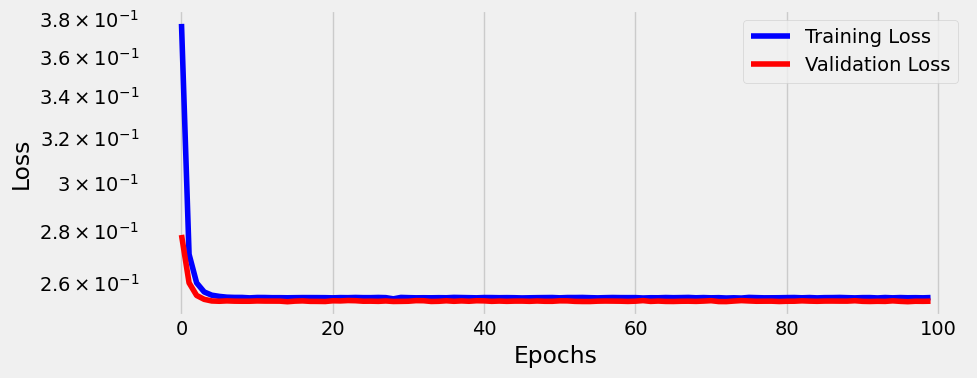

In [79]:
fig = arch.plot_losses()

fig.savefig("moons_loss_2.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Data visualization

In [80]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
threshold = 0.5

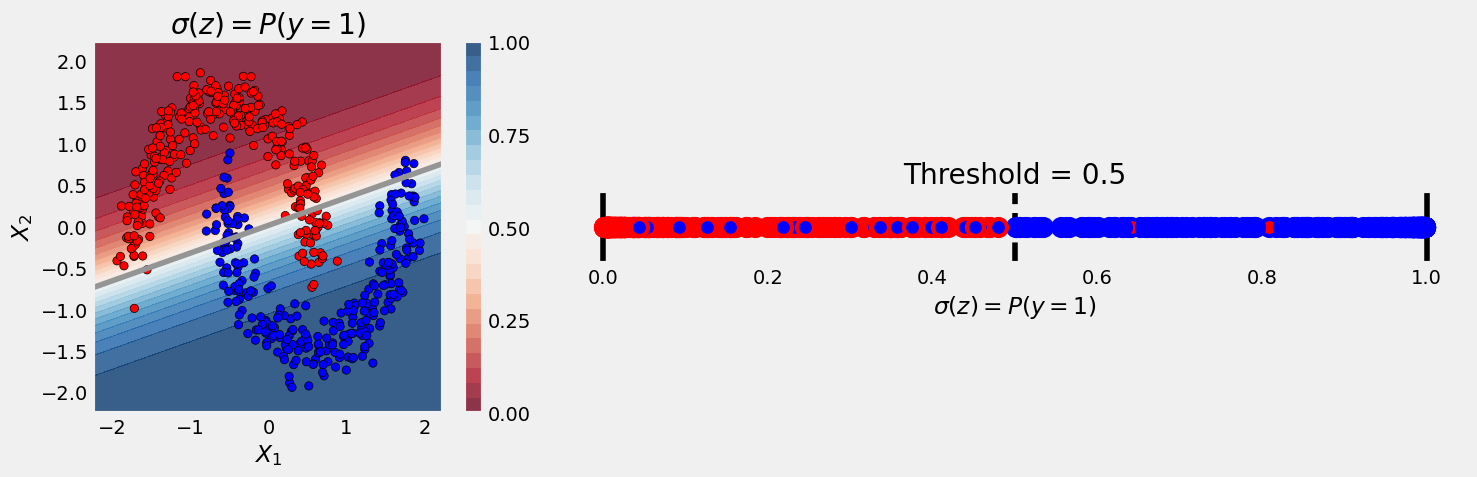

In [81]:
fig = figure9(X_val, y_val, arch.model, arch.device, probabilities_val, threshold)

fig.savefig("confusion_matrix_moons_2.png",
            format="png",
            dpi=400,
            bbox_inches="tight",
            transparent=False)

#### Metrics

In [82]:
logits_val = arch.predict(X_val)
probabilities_val = sigmoid(logits_val).squeeze()
cm_thresh50 = confusion_matrix(y_val, (probabilities_val >= 0.5))
cm_thresh50

array([[276,  36],
       [ 37, 251]])

In [83]:
precision_recall(cm_thresh50)

(np.float64(0.8745644599303136), np.float64(0.8715277777777778))

In [84]:
acc = accuracy_score(y_val, (probabilities_val >= 0.5))
acc

0.8783333333333333

#### Confusion Matrix

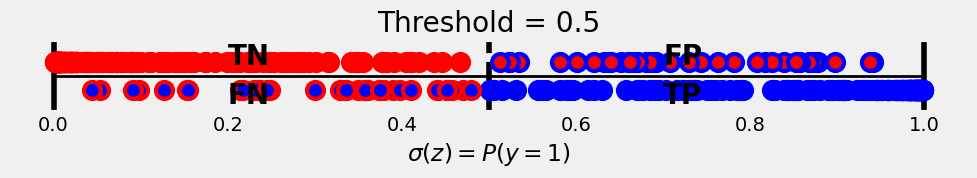

In [85]:
fig = figure10(y_val, probabilities_val, threshold, 0.04, True)